In [1]:
!python3 -m pip install mysqlclient --user


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
myvars = {}
with open("bkorlagu-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [67]:
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [4]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501_Fall2024_Sec22425_group03_db')
cursor = conn.cursor()

In [5]:
cursor.execute('SELECT * FROM mental_health_and_technology_usage_2024');
rows = cursor.fetchall()

In [6]:
import MySQLdb
import pandas as pd

# connecting with the my sql database
conn = MySQLdb.connect(
    host="localhost",
    user=myvars['DB username'],
    passwd=myvars['DB password'],
    db='I501_Fall2024_Sec22425_group03_db')
query= "SELECT * FROM mental_health_and_technology_usage_2024"
df= pd.read_sql(query, conn)
# as the header is repeated as first row we have droped the header and reset the index
#df = df.drop(index=0)
#df.reset_index(drop=True, inplace=True)
#pd.reset_option('all')
print(df.head())

      User_ID Age  Gender Technology_Usage_Hours Social_Media_Usage_Hours  \
0  USER-00001  23  Female                   6.57                      6.0   
1  USER-00002  21    Male                   3.01                     2.57   
2  USER-00003  51    Male                   3.04                     6.14   
3  USER-00004  25  Female                   3.84                     4.48   
4  USER-00005  53    Male                    1.2                     0.56   

  Gaming_Hours Screen_Time_Hours Mental_Health_Status Stress_Level  \
0         0.68             12.36                 Good          Low   
1         3.74              7.61                 Poor         High   
2         1.26              3.16                 Fair         High   
3         2.59             13.08            Excellent       Medium   
4         0.29             12.63                 Good          Low   

  Sleep_Hours Physical_Activity_Hours Support_Systems_Access  \
0        8.01                    6.71               

/tmp/ipykernel_1769469/3666842174.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, conn)


In [7]:
#exploratory data analysis

In [71]:
df.head()
#checking the first five rows of the data 

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.0,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.2,0.56,0.29,12.63,Good,Low,5.55,4.0,No,Positive,Yes


In [72]:
df
#checking for the total number of rows in the dataset

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.0,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.2,0.56,0.29,12.63,Good,Low,5.55,4.0,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,USER-09996,42,Male,7.05,0.41,0.53,13.9,Good,Medium,7.37,5.02,Yes,Neutral,No
9996,USER-09997,31,Other,3.12,6.79,0.8,1.17,Fair,Medium,8.92,9.78,No,Neutral,Yes
9997,USER-09998,23,Male,4.38,3.98,0.52,7.81,Poor,High,7.59,2.99,No,Positive,No
9998,USER-09999,38,Male,4.44,1.48,3.28,13.95,Poor,Medium,7.26,2.24,Yes,Neutral,Yes


In [73]:
df.shape
#checking for the total no of rows and columns

(10000, 14)

In [74]:
df.index
# to check the range of the values in the dataset 

RangeIndex(start=0, stop=10000, step=1)

In [76]:
df.columns
#gives the list of column names and datatype of column

Index(['User_ID', 'Age', 'Gender', 'Technology_Usage_Hours',
       'Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours',
       'Mental_Health_Status', 'Stress_Level', 'Sleep_Hours',
       'Physical_Activity_Hours', 'Support_Systems_Access',
       'Work_Environment_Impact', 'Online_Support_Usage'],
      dtype='object')

In [77]:
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes
#gives the datatype of the variables under each column

User_ID                      object
Age                           int64
Gender                       object
Technology_Usage_Hours      float64
Social_Media_Usage_Hours    float64
Gaming_Hours                float64
Screen_Time_Hours           float64
Mental_Health_Status         object
Stress_Level                 object
Sleep_Hours                 float64
Physical_Activity_Hours     float64
Support_Systems_Access       object
Work_Environment_Impact      object
Online_Support_Usage         object
dtype: object

In [78]:
df['User_ID'].unique()

array(['USER-00001', 'USER-00002', 'USER-00003', ..., 'USER-09998',
       'USER-09999', 'USER-10000'], dtype=object)

In [80]:
# Find the number of unique values in the 'User_ID' column
df['User_ID'].nunique()

10000

In [81]:
#to check for the number of unique values in the entire dataset
df.nunique()

User_ID                     10000
Age                            48
Gender                          3
Technology_Usage_Hours       1101
Social_Media_Usage_Hours      801
Gaming_Hours                  501
Screen_Time_Hours            1400
Mental_Health_Status            4
Stress_Level                    3
Sleep_Hours                   501
Physical_Activity_Hours      1001
Support_Systems_Access          2
Work_Environment_Impact         3
Online_Support_Usage            2
dtype: int64

In [82]:
#used to find the number of values in the entire datset and can be used on each column as well
df.count()

User_ID                     10000
Age                         10000
Gender                      10000
Technology_Usage_Hours      10000
Social_Media_Usage_Hours    10000
Gaming_Hours                10000
Screen_Time_Hours           10000
Mental_Health_Status        10000
Stress_Level                10000
Sleep_Hours                 10000
Physical_Activity_Hours     10000
Support_Systems_Access      10000
Work_Environment_Impact     10000
Online_Support_Usage        10000
dtype: int64

In [83]:
#to check the number of times each unique value is repeated with in each column in the data
categorical_vars = ['Gender', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage','Mental_Health_Status','Stress_Level']

for col in categorical_vars:
    print(f"Value counts for '{col}':\n{df[col].value_counts()}\n")

Value counts for 'Gender':
Gender
Other     3364
Male      3350
Female    3286
Name: count, dtype: int64

Value counts for 'Support_Systems_Access':
Support_Systems_Access
No     5006
Yes    4994
Name: count, dtype: int64

Value counts for 'Work_Environment_Impact':
Work_Environment_Impact
Negative    3378
Neutral     3312
Positive    3310
Name: count, dtype: int64

Value counts for 'Online_Support_Usage':
Online_Support_Usage
No     5013
Yes    4987
Name: count, dtype: int64

Value counts for 'Mental_Health_Status':
Mental_Health_Status
Excellent    2518
Good         2508
Fair         2490
Poor         2484
Name: count, dtype: int64

Value counts for 'Stress_Level':
Stress_Level
Medium    3338
Low       3332
High      3330
Name: count, dtype: int64



In [84]:
#to check for the basic information for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  object 
dtypes: floa

In [85]:
df.isnull().any()
#checks for hte null values in each column and (returns boolean for each column) false indicates that the column has no null values 

User_ID                     False
Age                         False
Gender                      False
Technology_Usage_Hours      False
Social_Media_Usage_Hours    False
Gaming_Hours                False
Screen_Time_Hours           False
Mental_Health_Status        False
Stress_Level                False
Sleep_Hours                 False
Physical_Activity_Hours     False
Support_Systems_Access      False
Work_Environment_Impact     False
Online_Support_Usage        False
dtype: bool

In [86]:
#to check for the total number of null values for each column
df.isnull().sum()

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64

In [87]:
#alternate method to check for the total number of missing values in each column 
import pandas as pd
nan_counts = df.isna().sum()
print(nan_counts)

User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


In [88]:
#checking if there are any empty strings by looping through all 
#columns in the dataset Loop through each column and count empty strings
empty_string_counts = {}
for column in df.columns:
    empty_string_counts[column] = (df[column] == '').sum()

# Print the results
print("Empty strings counts:\n", empty_string_counts)

Empty strings counts:
 {'User_ID': 0, 'Age': 0, 'Gender': 0, 'Technology_Usage_Hours': 0, 'Social_Media_Usage_Hours': 0, 'Gaming_Hours': 0, 'Screen_Time_Hours': 0, 'Mental_Health_Status': 0, 'Stress_Level': 0, 'Sleep_Hours': 0, 'Physical_Activity_Hours': 0, 'Support_Systems_Access': 0, 'Work_Environment_Impact': 0, 'Online_Support_Usage': 0}


In [89]:
# Check for inconsistent entries in 'Age' column
age_inconsistent_count = 0
for value in df['Age']:
    if not isinstance(value, int):
        age_inconsistent_count += 1
print("Inconsistent entries in 'Age' column:", age_inconsistent_count)

# Check for inconsistent entries in 'Technology_Usage_Hours' column
tech_usage_inconsistent_count = 0
for value in df['Technology_Usage_Hours']:
    if not isinstance(value, float):
        tech_usage_inconsistent_count += 1
print("Inconsistent entries in 'Technology_Usage_Hours' column:", tech_usage_inconsistent_count)

# Check for inconsistent entries in 'Social_Media_Usage_Hours' column
social_media_usage_inconsistent_count = 0
for value in df['Social_Media_Usage_Hours']:
    if not isinstance(value, float):
        social_media_usage_inconsistent_count += 1
print("Inconsistent entries in 'Social_Media_Usage_Hours' column:", social_media_usage_inconsistent_count)

# Check for inconsistent entries in 'Gaming_Hours' column
gaming_hours_inconsistent_count = 0
for value in df['Gaming_Hours']:
    if not isinstance(value, float):
        gaming_hours_inconsistent_count += 1
print("Inconsistent entries in 'Gaming_Hours' column:", gaming_hours_inconsistent_count)

# Check for inconsistent entries in 'Screen_Time_Hours' column
screen_time_inconsistent_count = 0
for value in df['Screen_Time_Hours']:
    if not isinstance(value, float):
        screen_time_inconsistent_count += 1
print("Inconsistent entries in 'Screen_Time_Hours' column:", screen_time_inconsistent_count)

# Check for inconsistent entries in 'Mental_Health_Status' column
mental_health_status_inconsistent_count = 0
for value in df['Mental_Health_Status']:
    if not isinstance(value, str):
        mental_health_status_inconsistent_count += 1
print("Inconsistent entries in 'Mental_Health_Status' column:", mental_health_status_inconsistent_count)

# Check for inconsistent entries in 'Stress_Level' column
stress_level_inconsistent_count = 0
for value in df['Stress_Level']:
    if not isinstance(value, str):
        stress_level_inconsistent_count += 1
print("Inconsistent entries in 'Stress_Level' column:", stress_level_inconsistent_count)

# Check for inconsistent entries in 'Sleep_Hours' column
sleep_hours_inconsistent_count = 0
for value in df['Sleep_Hours']:
    if not isinstance(value, float):
        sleep_hours_inconsistent_count += 1
print("Inconsistent entries in 'Sleep_Hours' column:", sleep_hours_inconsistent_count)

# Check for inconsistent entries in 'Physical_Activity_Hours' column
physical_activity_inconsistent_count = 0
for value in df['Physical_Activity_Hours']:
    if not isinstance(value, float):
        physical_activity_inconsistent_count += 1
print("Inconsistent entries in 'Physical_Activity_Hours' column:", physical_activity_inconsistent_count)

# Check for inconsistent entries in 'Gender' column
gender_inconsistent_count = 0
for value in df['Gender']:
    if not isinstance(value, str):
        gender_inconsistent_count += 1
print("Inconsistent entries in 'Gender' column:", gender_inconsistent_count)

# Check for inconsistent entries in 'Support_Systems_Access' column
support_systems_inconsistent_count = 0
for value in df['Support_Systems_Access']:
    if not isinstance(value, str):
        support_systems_inconsistent_count += 1
print("Inconsistent entries in 'Support_Systems_Access' column:", support_systems_inconsistent_count)

# Check for inconsistent entries in 'Work_Environment_Impact' column
work_environment_impact_inconsistent_count = 0
for value in df['Work_Environment_Impact']:
    if not isinstance(value, str):
        work_environment_impact_inconsistent_count += 1
print("Inconsistent entries in 'Work_Environment_Impact' column:", work_environment_impact_inconsistent_count)

# Check for inconsistent entries in 'Online_Support_Usage' column
online_support_usage_inconsistent_count = 0
for value in df['Online_Support_Usage']:
    if not isinstance(value, str):
        online_support_usage_inconsistent_count += 1
print("Inconsistent entries in 'Online_Support_Usage' column:", online_support_usage_inconsistent_count)


Inconsistent entries in 'Age' column: 0
Inconsistent entries in 'Technology_Usage_Hours' column: 0
Inconsistent entries in 'Social_Media_Usage_Hours' column: 0
Inconsistent entries in 'Gaming_Hours' column: 0
Inconsistent entries in 'Screen_Time_Hours' column: 0
Inconsistent entries in 'Mental_Health_Status' column: 0
Inconsistent entries in 'Stress_Level' column: 0
Inconsistent entries in 'Sleep_Hours' column: 0
Inconsistent entries in 'Physical_Activity_Hours' column: 0
Inconsistent entries in 'Gender' column: 0
Inconsistent entries in 'Support_Systems_Access' column: 0
Inconsistent entries in 'Work_Environment_Impact' column: 0
Inconsistent entries in 'Online_Support_Usage' column: 0


In [90]:
#descriptive statistics
df.describe()

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


No outliers found in 'Age'.


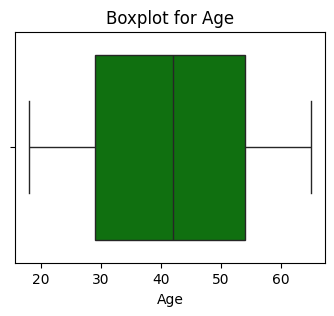

No outliers found in 'Technology_Usage_Hours'.


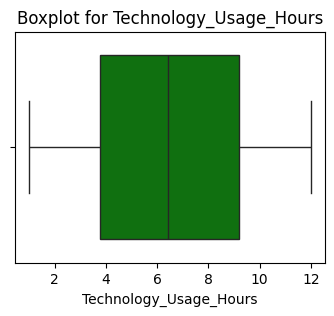

No outliers found in 'Social_Media_Usage_Hours'.


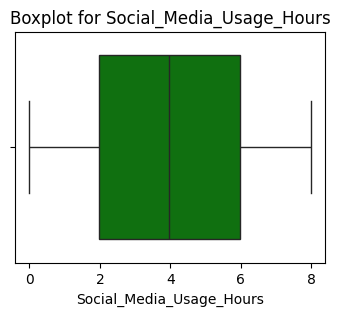

No outliers found in 'Gaming_Hours'.


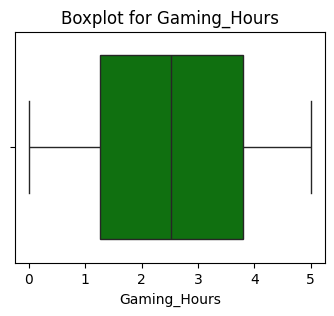

No outliers found in 'Screen_Time_Hours'.


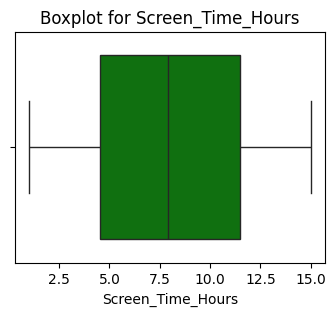

No outliers found in 'Sleep_Hours'.


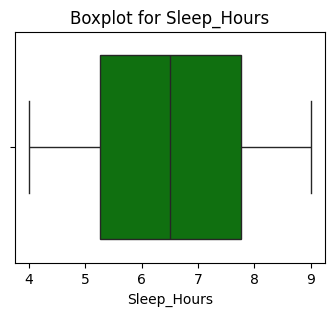

No outliers found in 'Physical_Activity_Hours'.


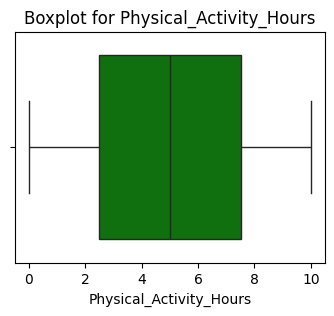

In [91]:
#checking for the outliers based on the interquartile range 
import seaborn as sns
import matplotlib.pyplot as plt
#listing the columns with float and int values
# Loop through all numeric columns to check for outliers and plot boxplots
numcolumns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numeric column
for column in numcolumns:
    # Extract the data for the current column
    column_data = df[column]
for column in numcolumns:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Print outliers for each column
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    #print(f"Outliers in '{column}':")
    #print(outliers)
    if outliers.empty:
        print(f"No outliers found in '{column}'.")
    else:
        print(f"Outliers in '{column}':")
        print(outliers)
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=df[column], color='green')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()


In [27]:
# the above box plots indicate that there are no outliers in the dataset

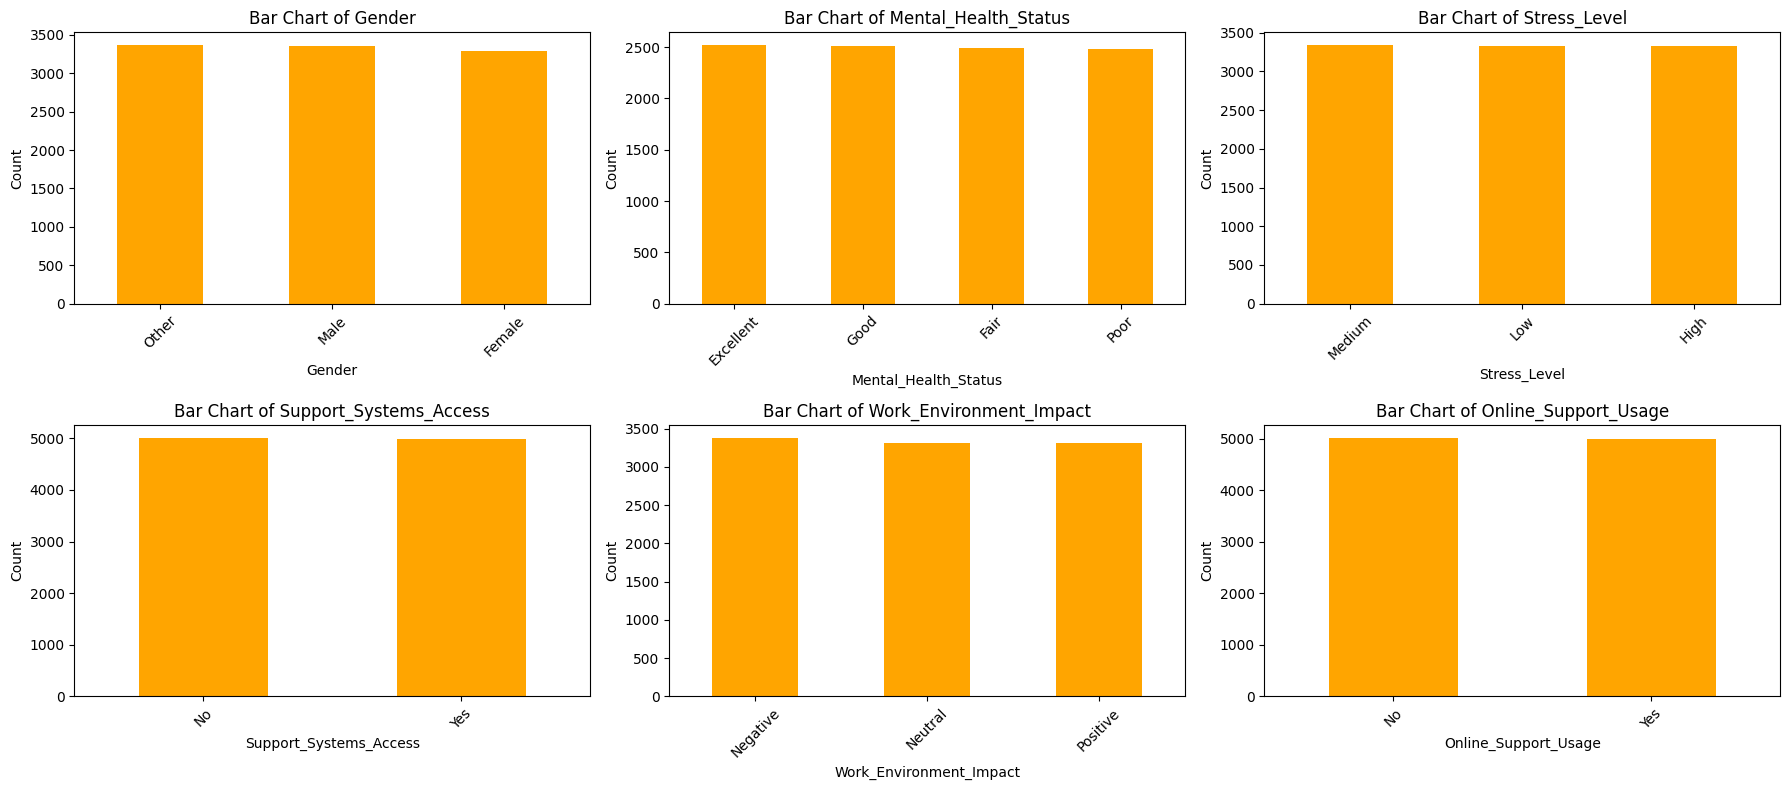

In [92]:
import matplotlib.pyplot as plt

# list of categorical variables
categoricalcol = ['Gender', 'Mental_Health_Status', 'Stress_Level', 
                    'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(categoricalcol):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='orange')
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [29]:
# checking for the normality of distribution(if it is gaussian distribution) for each of the continuous variable
#using visualization and the shapiro wilk test

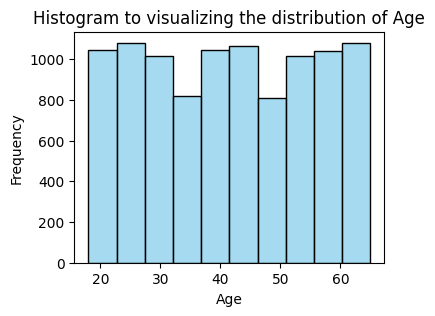

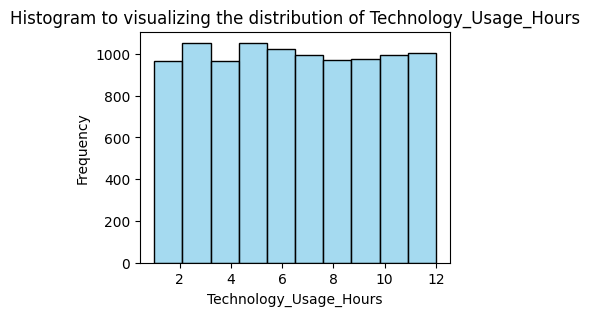

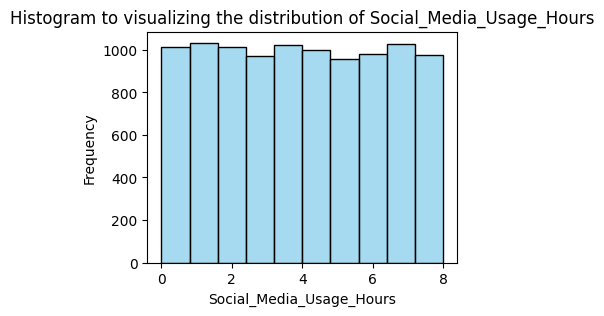

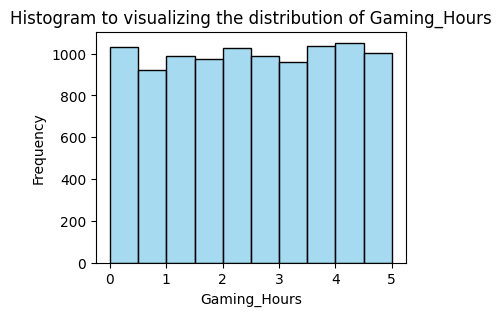

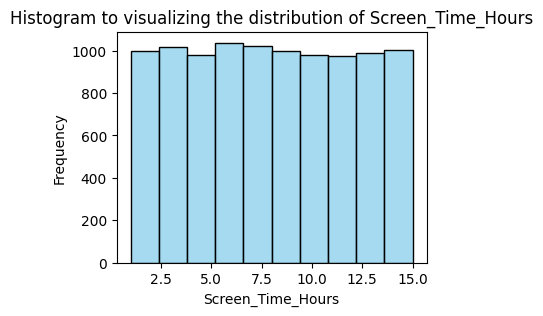

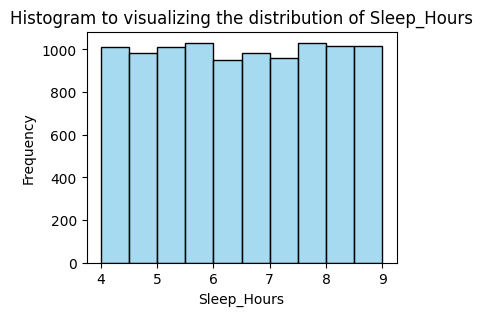

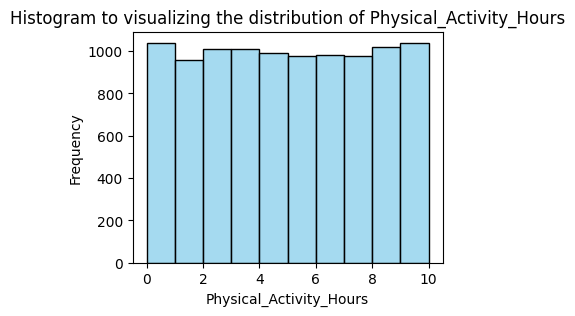

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numcolumns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numeric column
for column in numcolumns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[column], bins=10, color='skyblue')
    plt.title(f"Histogram to visualizing the distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [31]:
#distribution of the output variable plotted against the input variables 

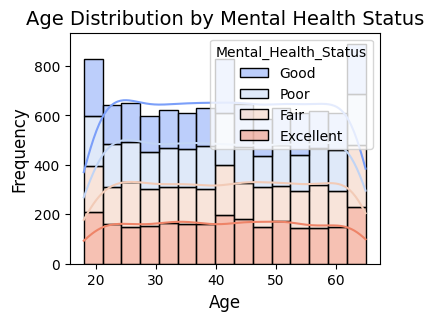

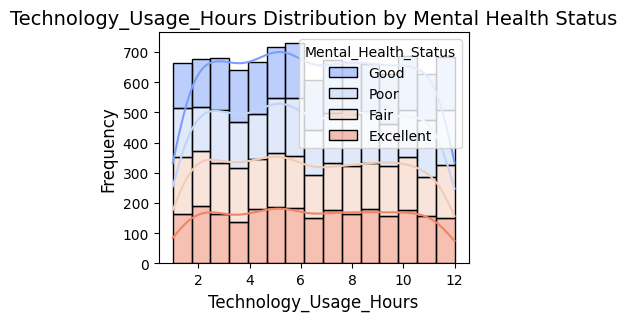

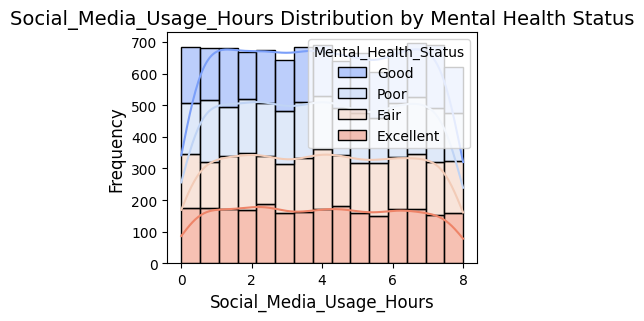

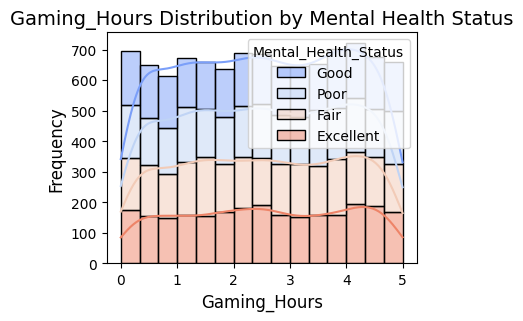

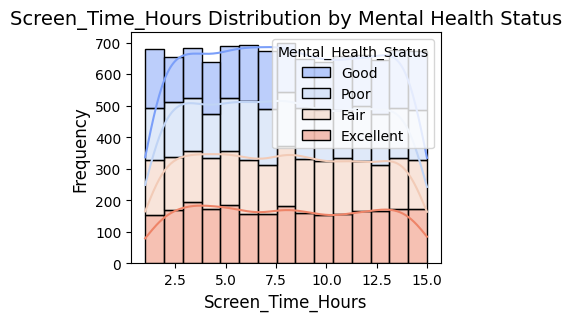

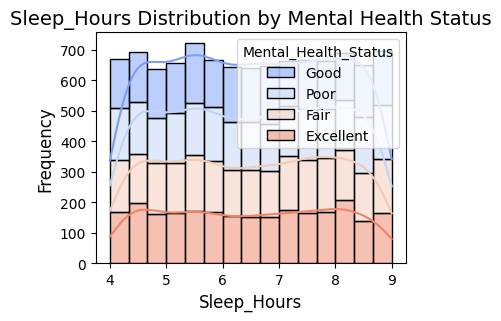

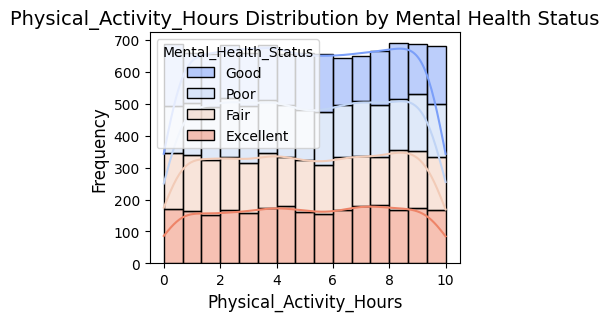

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset if not already loaded
# df = pd.read_csv("your_dataset.csv")

# List of numerical variables to compare with 'Mental Health Status'
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through the variables and create histograms grouped by 'Mental Health Status'
for col in columns:
    # Create a new figure for each plot
    plt.figure(figsize=(4, 3))  # Adjust size if needed
    
    # Use seaborn's histplot with 'hue' parameter to group by 'Mental Health Status'
    sns.histplot(data=df, x=col, hue='Mental_Health_Status', kde=True, bins=15,
                 multiple="stack", palette="coolwarm")
    
    # Title and labels for each plot
    plt.title(f'{col} Distribution by Mental Health Status', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show each plot
    plt.show()

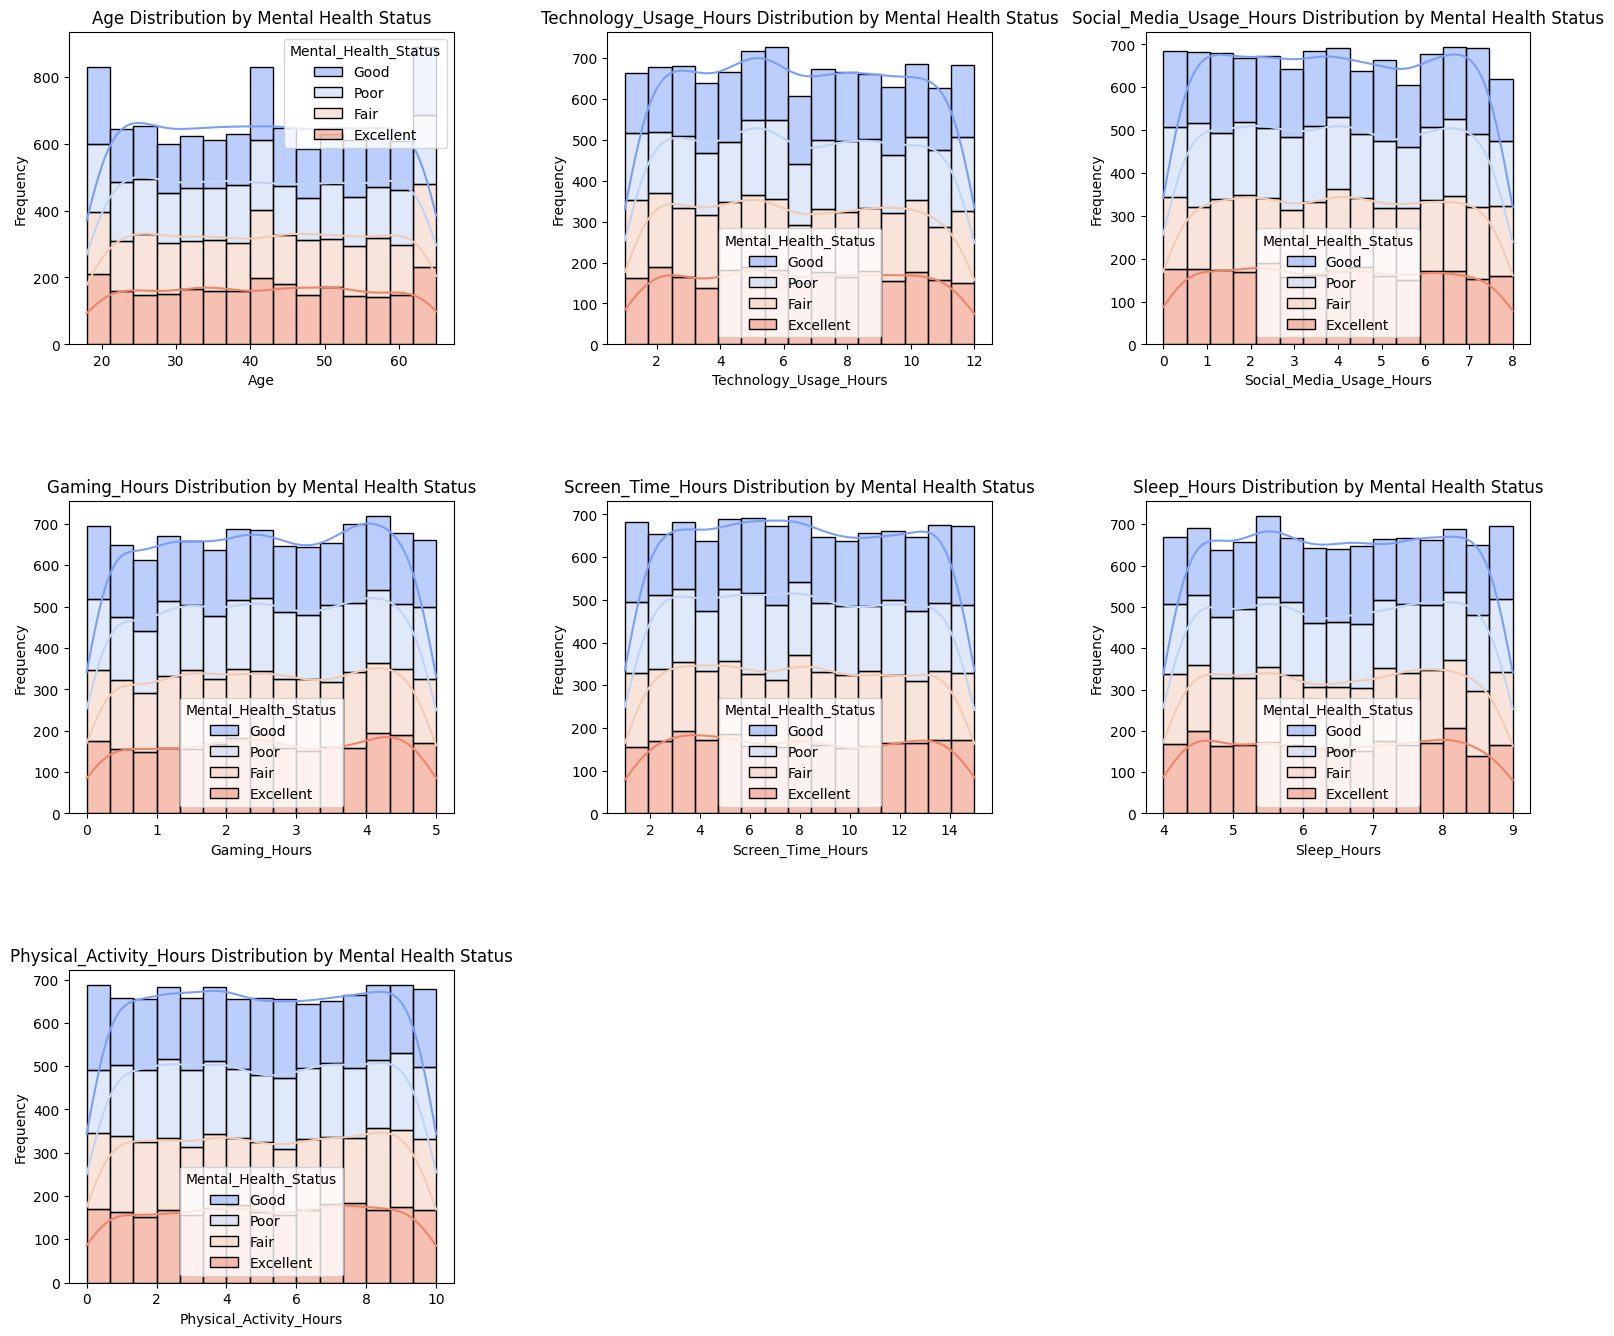

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset if not already loaded
# df = pd.read_csv("your_dataset.csv")
# List of variables to compare with 'Mental Health Status'
variables = ['Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours', 
             'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']

# Set up the figure for subplots
plt.figure(figsize=(16, 14))  # Increase the figure size

# Loop through the variables and create histograms grouped by 'Mental Health Status'
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns (adjust if needed)
    
    # Use seaborn's histplot with 'hue' parameter to group by 'Mental Health Status'
    sns.histplot(data=df, x=var, hue='Mental_Health_Status', kde=True, bins=15, 
                 multiple="stack", palette="coolwarm")
    
    # Title and labels for each plot
    plt.title(f'{var} Distribution by Mental Health Status', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

# Adjust layout to prevent overlap (manually fine-tune spacing)
plt.tight_layout(pad=3.0)  # Increase padding between subplots

# Further adjustments if needed
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust horizontal and vertical space

# Show the plot
plt.show()

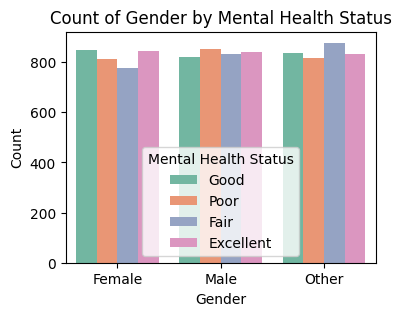

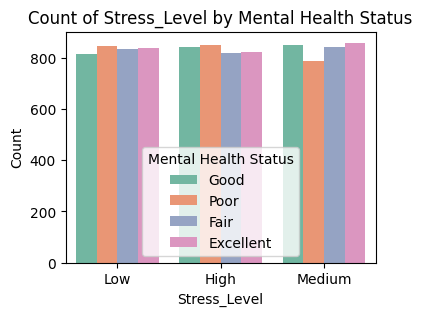

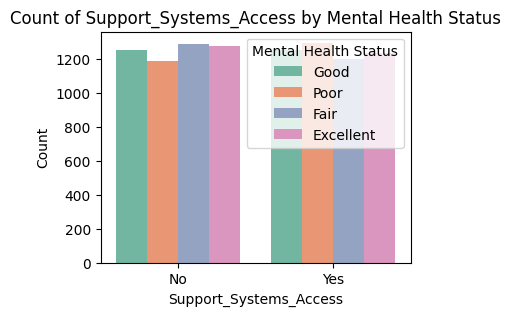

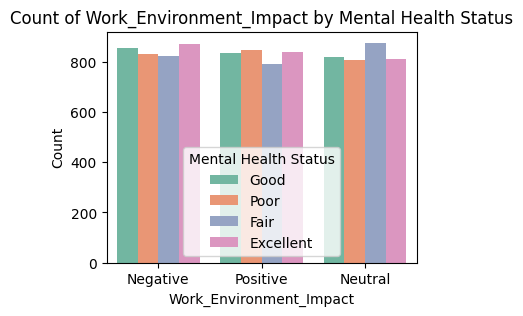

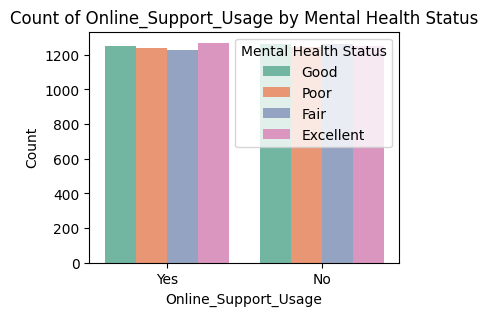

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

object_columns = ['Gender', 'Stress_Level', 
                  'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage']
for col in object_columns:
    
        plt.figure(figsize=(4, 3))
        sns.countplot(data=df, x=col, hue='Mental_Health_Status', palette='Set2')
        plt.title(f'Count of {col} by Mental Health Status')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Mental Health Status')
        plt.show()

In [35]:
#performing the normality tests.

In [97]:
#performing the shapiro wilk test to check for the normality of the data
#null: data is normally distributed
#alt: data is not normally distributed
from scipy.stats import shapiro
#for column in df.select_dtypes(include=['float64', 'int64']).columns:
numcolumns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numeric column
for column in numcolumns:
    # Extract the data for the current column
    column_data = df[column]
    stat, p = shapiro(df[column])
    print(f"Normality test for {column}: Statistic={stat}, P-value={p}")

Normality test for Age: Statistic=0.9528176784515381, P-value=0.0
Normality test for Technology_Usage_Hours: Statistic=0.955736517906189, P-value=0.0
Normality test for Social_Media_Usage_Hours: Statistic=0.953722357749939, P-value=0.0
Normality test for Gaming_Hours: Statistic=0.9541616439819336, P-value=0.0
Normality test for Screen_Time_Hours: Statistic=0.9551796913146973, P-value=0.0
Normality test for Sleep_Hours: Statistic=0.9535698890686035, P-value=0.0
Normality test for Physical_Activity_Hours: Statistic=0.9535227417945862, P-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
#because of the user warning we decided to use another normality test that is D’Agostino and Pearson’s Normality Test
from scipy.stats import normaltest

# Define significance level
alpha = 0.05

# Loop through all numeric columns with continuous variables.
#for column in df.select_dtypes(include=['float64', 'int64']).columns:
numcolumns = df.select_dtypes(include=['float64', 'int64']).columns
# Iterate through each numeric column
for column in numcolumns:
    # Extract the data for the current column
    column_data = df[column]
    stat, pvalue = normaltest(df[column])  # Perform the test
    print(f"Normality test for {column}: Statistic={stat}, P-value={pvalue}")
    if pvalue > alpha:
        print(f"  Result: The data in '{column}' is likely normally distributed (p-value > {alpha}).\n")
    else:
        print(f"  Result: The data in '{column}' is not normally distributed (p-value <= {alpha}).\n")

Normality test for Age: Statistic=9408.581290249318, P-value=0.0
  Result: The data in 'Age' is not normally distributed (p-value <= 0.05).

Normality test for Technology_Usage_Hours: Statistic=8008.534503536944, P-value=0.0
  Result: The data in 'Technology_Usage_Hours' is not normally distributed (p-value <= 0.05).

Normality test for Social_Media_Usage_Hours: Statistic=9670.46024652953, P-value=0.0
  Result: The data in 'Social_Media_Usage_Hours' is not normally distributed (p-value <= 0.05).

Normality test for Gaming_Hours: Statistic=9143.40972297552, P-value=0.0
  Result: The data in 'Gaming_Hours' is not normally distributed (p-value <= 0.05).

Normality test for Screen_Time_Hours: Statistic=8262.713208140503, P-value=0.0
  Result: The data in 'Screen_Time_Hours' is not normally distributed (p-value <= 0.05).

Normality test for Sleep_Hours: Statistic=9770.121803830401, P-value=0.0
  Result: The data in 'Sleep_Hours' is not normally distributed (p-value <= 0.05).

Normality test

In [38]:
#based on the normality do the statistical tests
#since all the values in the dataset have p-values <0.05 indicating that the data is not normally distributed 
#we decided to proceed with the non-parametric tests

In [100]:
#Decided to use the non parametric tests 
#In non paramteric tests to check for the statistical association between the categorical variables we used chi square test
import pandas as pd
from scipy.stats import chi2_contingency
categorical_vars = ['Gender', 'Support_Systems_Access', 'Work_Environment_Impact', 'Online_Support_Usage','Stress_Level']

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Mental_Health_Status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}:")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {p_value:.3f}\n")

Chi-square test for Gender:
Chi-square statistic: 6.591
p-value: 0.360

Chi-square test for Support_Systems_Access:
Chi-square statistic: 8.328
p-value: 0.040

Chi-square test for Work_Environment_Impact:
Chi-square statistic: 7.340
p-value: 0.291

Chi-square test for Online_Support_Usage:
Chi-square statistic: 0.600
p-value: 0.896

Chi-square test for Stress_Level:
Chi-square statistic: 4.790
p-value: 0.571



In [101]:
#label encoding before performing the statistical test to check for the degree of association between the 
#continuous independent variable and the depended varibale 
from sklearn.preprocessing import LabelEncoder

#Initialize Label Encoder
label_encoder = LabelEncoder()

# label Encoding for nominal variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Support_Systems_Access'] = label_encoder.fit_transform(df['Support_Systems_Access'])
df['Online_Support_Usage'] = label_encoder.fit_transform(df['Online_Support_Usage'])

# Manual Encoding for ordinal variables
work_env_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Work_Environment_Impact'] = df['Work_Environment_Impact'].map(work_env_mapping)

mental_health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
df['Mental_Health_Status'] = df['Mental_Health_Status'].map(mental_health_mapping)

# Mapping for 'Stress_Level' (ordinal)
stress_level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Stress_Level'] = df['Stress_Level'].map(stress_level_mapping)

df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,0,6.57,6.00,0.68,12.36,2,0,8.01,6.71,0,0,1
1,USER-00002,21,1,3.01,2.57,3.74,7.61,0,2,7.28,5.88,1,2,0
2,USER-00003,51,1,3.04,6.14,1.26,3.16,1,2,8.04,9.81,0,0,0
3,USER-00004,25,0,3.84,4.48,2.59,13.08,3,1,5.62,5.28,1,0,1
4,USER-00005,53,1,1.20,0.56,0.29,12.63,2,0,5.55,4.00,0,2,1


In [102]:
#using logit ordinal regression as a statistical test for the continuous independent variable and the ordinal dependent variable
!pip install statsmodels
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Label encode the categorical 'Mental_Health_Status' column
#label_encoder = LabelEncoder()
#df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])

# Select only numeric columns for independent variables
inputcolumns= ['Age']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Technology_Usage_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Social_Media_Usage_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Gaming_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Screen_Time_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Sleep_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

inputcolumns= ['Physical_Activity_Hours']
mod_log = OrderedModel(df['Mental_Health_Status'],  df[inputcolumns], distr='logit')              
res_log = mod_log.fit(method='bfgs', disp=False)

print(res_log.summary())

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
                              OrderedModel Results                              
Dep. Variable:     Mental_Health_Status   Log-Likelihood:                -13863.
Model:                     OrderedModel   AIC:                         2.773e+04
Method:              Maximum Likelihood   BIC:                         2.776e+04
Date:                  Sat, 14 Dec 2024                                         
Time:                          18:29:51                                         
No. Observations:                 10000                                         
Df Residuals:                      9996                                         
Df Model:                             1                                         
                 coef    std err          z      P>|z|      [0.025   

Spearman correlation for Age: correlation=0.000, p-value=0.975
Spearman correlation for Gender: correlation=-0.009, p-value=0.390
Spearman correlation for Technology_Usage_Hours: correlation=-0.007, p-value=0.464
Spearman correlation for Social_Media_Usage_Hours: correlation=-0.005, p-value=0.627
Spearman correlation for Gaming_Hours: correlation=0.006, p-value=0.569
Spearman correlation for Screen_Time_Hours: correlation=0.005, p-value=0.629
Spearman correlation for Stress_Level: correlation=-0.001, p-value=0.947
Spearman correlation for Sleep_Hours: correlation=-0.009, p-value=0.346
Spearman correlation for Physical_Activity_Hours: correlation=0.004, p-value=0.707
Spearman correlation for Support_Systems_Access: correlation=-0.016, p-value=0.104
Spearman correlation for Work_Environment_Impact: correlation=-0.007, p-value=0.472
Spearman correlation for Online_Support_Usage: correlation=0.004, p-value=0.659


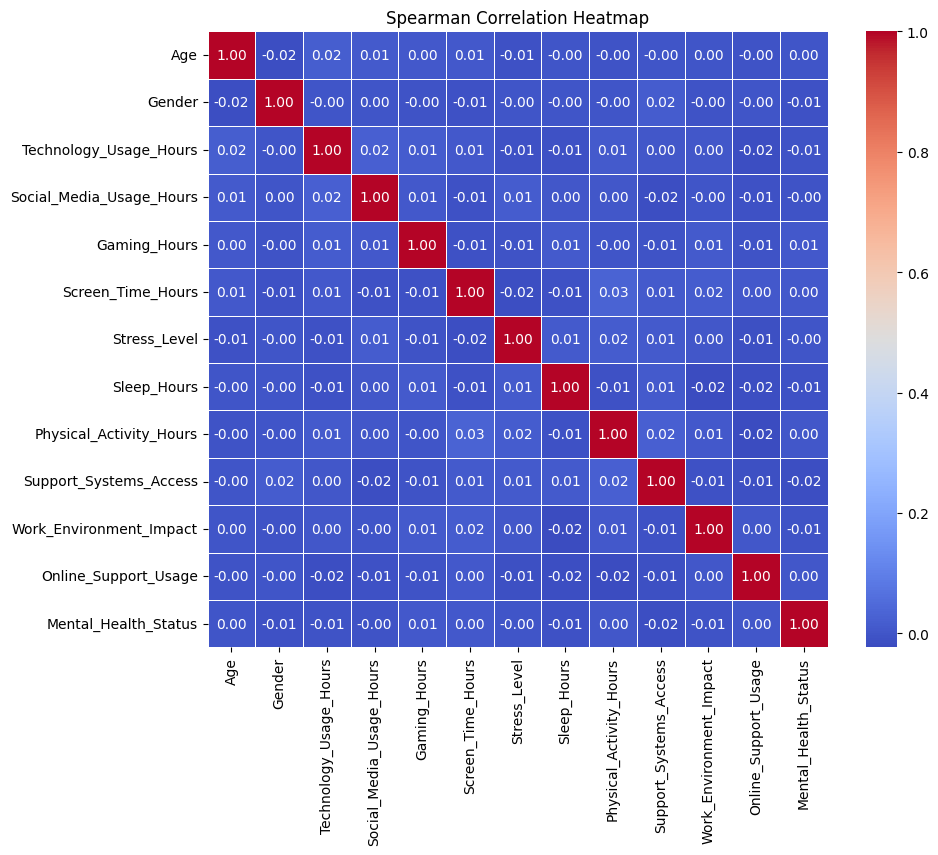

In [103]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# exclude 'User_ID' and 'Mental_Health_Status' from input columns
inputcolumns = df.columns.drop(['User_ID', 'Mental_Health_Status'])

# spearman's correlation for each input column with 'Mental_Health_Status'
for column in inputcolumns:
    correlation, p_value = stats.spearmanr(df[column], df['Mental_Health_Status'])
    print(f"Spearman correlation for {column}: correlation={correlation:.3f}, p-value={p_value:.3f}")


selected_columns = inputcolumns.to_list() + ['Mental_Health_Status']
correlation_matrix = df[selected_columns].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [43]:
#based on the correlation values we can see that the correaltion is week between any of the input variales and the output variables.

In [44]:
#since our outcome variable (Mental Health Status) is an ordinal variable we choose to proceed with the
#supervised machine learning algorithms.
#the machine learning algorithms we used are ordinal logistic regression, random forest, xgboost, light gbm.

In [104]:
#Data preprocessing: splitting the data into for model training and testing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Mental_Health_Status', 'User_ID'])  #other columns in the df are input(independent variables)

# Target (dependent variable)
y = df['Mental_Health_Status']  # The target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
#trainig and evaluating the models based on various machine learning methods

Random Forest Accuracy: 0.2535

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.28      0.27       492
           1       0.24      0.25      0.25       498
           2       0.27      0.24      0.26       513
           3       0.25      0.24      0.24       497

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2000
weighted avg       0.25      0.25      0.25      2000


Confusion Matrix:
 [[140 127  95 130]
 [130 124 133 111]
 [144 126 124 119]
 [141 130 107 119]]


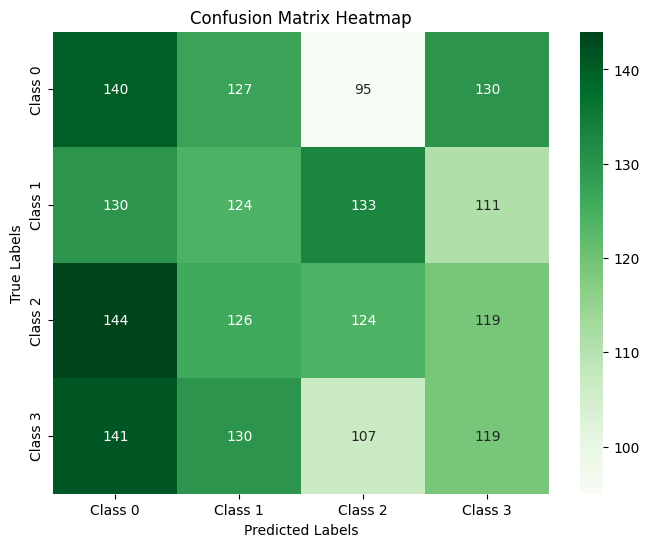

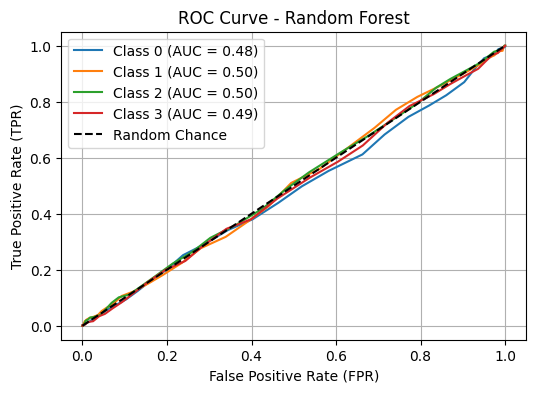

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

# Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Infer classes from y_test
classes = np.unique(y_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=classes)
y_pred_prob_rf = rf_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

XGBoost Accuracy: 0.2310

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.20      0.20       492
           1       0.24      0.25      0.25       498
           2       0.24      0.23      0.24       513
           3       0.23      0.25      0.24       497

    accuracy                           0.23      2000
   macro avg       0.23      0.23      0.23      2000
weighted avg       0.23      0.23      0.23      2000


Confusion Matrix:
 [[140 127  95 130]
 [130 124 133 111]
 [144 126 124 119]
 [141 130 107 119]]


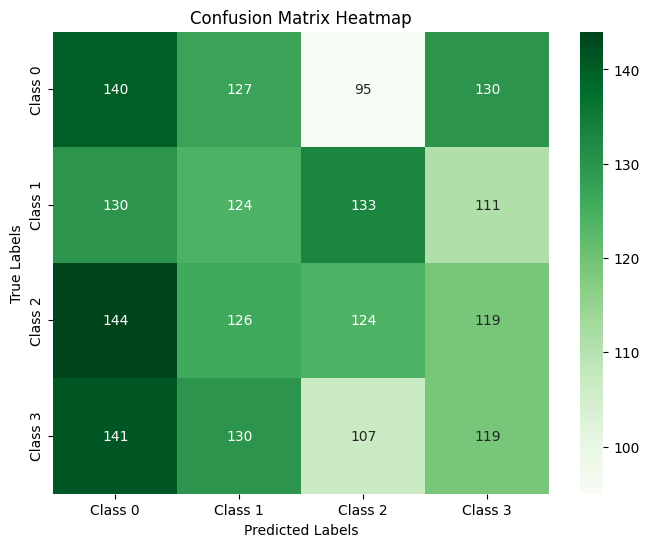

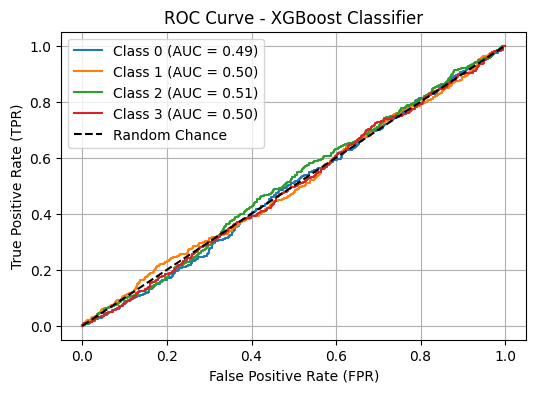

In [106]:
# Importing necessary libraries
import xgboost as xgb

# Initialize the XGBoost Classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, eval_metric='mlogloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm)

# Plotting the Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Infer classes from y_test
classes = np.unique(y_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=classes)
y_pred_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(6,4))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1590
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] Start training from score -1.390302
[LightGBM] [Info] Start training from score -1.390302
[LightGBM] [Info] Start training from score -1.388797
[LightGBM] [Info] Start training from score -1.375849
Accuracy: 0.2505

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.22      0.23       492
           1       0.27      0.26      0.27       498
           2       0.26      0.23      0.25       513
           3       0.24      0.29  

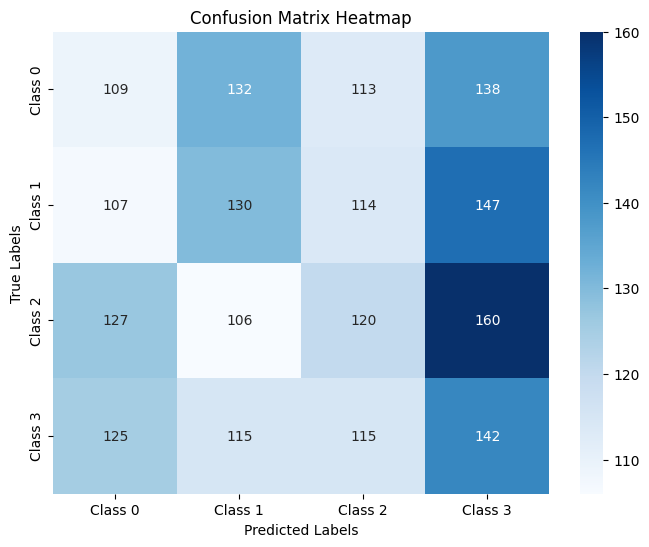

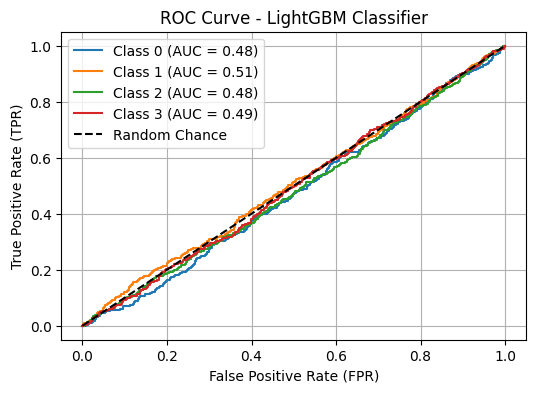

In [109]:
!pip install lightgbm
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the LightGBM model
lgbm_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(y.unique()), random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Infer classes from y_test
classes = np.unique(y_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=classes)
y_pred_prob = lgbm_model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - LightGBM Classifier')
plt.legend(loc='best')
plt.grid()
plt.show()

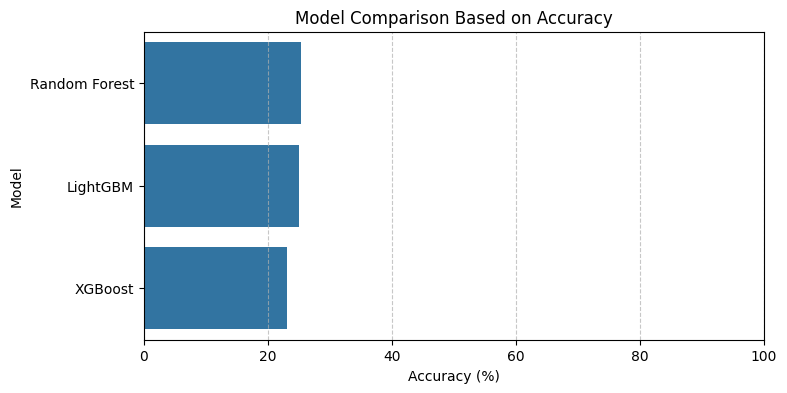

In [110]:
# Calculate and store accuracies as percentages
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "Accuracy (%)": [
        accuracy_score(y_test, rf_model.predict(X_test)) * 100,
        accuracy_score(y_test, model.predict(X_test)) * 100,  
        accuracy_score(y_test, lgbm_model.predict(X_test)) * 100]})

# Sort results by accuracy for better visualization
results = results.sort_values(by="Accuracy (%)", ascending=False)

# Plot accuracies
plt.figure(figsize=(8, 4))
sns.barplot(x="Accuracy (%)", y="Model", data=results)
plt.title("Model Comparison Based on Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0, 100)  
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()